

<h1 align="center"><font size="5">Finding best predictive model for Loan repayment</font></h1>


In our pervious notebook we have visualize the data and figured out the important factor for loan repayment. 

**As our problem require to predict the category of the client in the form of loan status which is also our Target variable therefore we will apply classfication predicting algorithm for our purpose.**

### Objectives

In this section we will do the 

* One hot coding.<br>
* Feature selection.<br>
* Normalizing Data.<br>
* Splitting our data into training and test set.<br>
* We will try various classification algorithms and will determine the **best classifier for our Dataset**.<br>



In [1]:
!pip install seaborn

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

### Loading data into the pandas Dataframe

We will recall and load the dataset we cleaned and visualized in our previous exercise.

## One Hot Encoding

#### How about education?


In [6]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.788462
                      COLLECTION     0.211538
High School or Below  PAIDOFF        0.715116
                      COLLECTION     0.284884
Master or Above       PAIDOFF        0.750000
                      COLLECTION     0.250000
college               PAIDOFF        0.773256
                      COLLECTION     0.226744
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [7]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,50,1,Bechalor
1,300,7,35,0,Master or Above
2,1000,30,43,1,High School or Below
3,1000,30,26,0,college
4,800,15,29,0,Bechalor


#### Using one hot encoding technique to convert categorical varables to binary variables and concat them to the feature Data Frame


In [8]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [9]:
Feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Principal             400 non-null    int64
 1   terms                 400 non-null    int64
 2   age                   400 non-null    int64
 3   Gender                400 non-null    int64
 4   weekend               400 non-null    int64
 5   Bechalor              400 non-null    uint8
 6   High School or Below  400 non-null    uint8
 7   college               400 non-null    uint8
dtypes: int64(5), uint8(3)
memory usage: 16.9 KB


### Feature Selection


Let's define feature sets, X:


In [10]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


What are our lables?


In [11]:
y = df['loan_status']
y[0:5]

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
Name: loan_status, dtype: object

In [12]:
y.replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)

In [13]:
y = np.array(y)
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


# Classification


Now we will use the training set to build an accurate model. Then will use the test set to report the accuracy of the model<br>

#### We will be using the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression
<br>

**We will also perform Hyperparameter Tuning to find the best parameters for our classification models.**

## Splitting the dataset 
**Using the function train_test_split to split the data X and y into training and test data.**

* Setting the parameter test_size to 0.2 
* Random_state to 4. 
* Cross Validation CV = 10

**The training data and test data will be assigned to the following labels.**



In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (320, 8) (320,)
Test set:  (80, 8) (80,)


In [15]:
X_train= preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test= preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_train[285:300]

array([[ 0.48968486,  0.93597824,  1.25285518, -0.42521972, -1.21680736,
        -0.3992747 , -0.8433445 ,  1.1411215 ],
       [ 0.48968486,  0.93597824, -0.22169444, -0.42521972,  0.82182277,
        -0.3992747 ,  1.18575505, -0.87633087],
       [ 0.48968486, -0.91820894, -0.71321098,  2.35172538,  0.82182277,
        -0.3992747 , -0.8433445 ,  1.1411215 ],
       [ 0.48968486,  0.93597824, -1.20472752, -0.42521972,  0.82182277,
        -0.3992747 , -0.8433445 ,  1.1411215 ],
       [ 0.48968486,  0.93597824,  0.10598325, -0.42521972,  0.82182277,
        -0.3992747 ,  1.18575505, -0.87633087],
       [ 0.48968486,  0.93597824, -0.22169444, -0.42521972,  0.82182277,
        -0.3992747 , -0.8433445 ,  1.1411215 ],
       [ 0.48968486,  0.93597824, -0.38553328, -0.42521972, -1.21680736,
        -0.3992747 , -0.8433445 ,  1.1411215 ],
       [ 0.48968486,  0.93597824, -0.54937213, -0.42521972, -1.21680736,
        -0.3992747 , -0.8433445 ,  1.1411215 ],
       [ 0.48968486,  0.93597824

In [16]:
X_test.shape, X_train.shape

((80, 8), (320, 8))

In [17]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score,  classification_report, log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

### Function to help plot confusion matrix

In [18]:
def plot_confusion_matrix(y,y_predict):
    
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); 
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['COLLECTION', 'PAIDOFF']); ax.yaxis.set_ticklabels(['COLLECTION', 'PAIDOFF'])

# K Nearest Neighbor(KNN)

We should find the best k to build the model with the best accuracy.



Creating a k nearest neighbors object then making a GridSearchCV object knn_cv with cv = 10. Fitting the object to find the best parameters from the dictionary parameters.

In [19]:
parameters1 = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [20]:
gsvc1 = GridSearchCV(KNN, parameters1, scoring = 'accuracy', cv = 10 )
knn_cv = gsvc1.fit(X_train, y_train)

In [21]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'ball_tree', 'n_neighbors': 9, 'p': 1}
accuracy : 0.7125


In [22]:
print('Accuracy score: - ', knn_cv.score(X_test, y_test))

Accuracy score: -  0.75


### Plotting Confusion Matrix

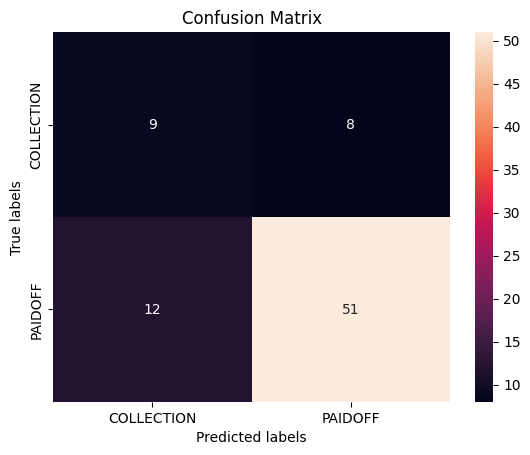

In [23]:
yhat1 = knn_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat1)

In [24]:
metrics.accuracy_score(y_test, yhat1)

0.75

In [25]:
print (classification_report(y_test,yhat1))

              precision    recall  f1-score   support

           0       0.43      0.53      0.47        17
           1       0.86      0.81      0.84        63

    accuracy                           0.75        80
   macro avg       0.65      0.67      0.65        80
weighted avg       0.77      0.75      0.76        80



# Decision Tree Classifier


Creating a Decision tree classifier object then making a GridSearchCV object tree with cv = 10. Fitting the object to find the best parameters from the dictionary parameters.

In [26]:
parameters2 = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [27]:
gsvc2 = GridSearchCV(tree, parameters2, scoring = 'accuracy', cv = 10 )
tree_cv = gsvc2.fit(X_train, y_train)

In [28]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.765625


In [29]:
print('Accuracy score: - ', tree_cv.score(X_test, y_test))

Accuracy score: -  0.7


### Plotting Confusion Matrix

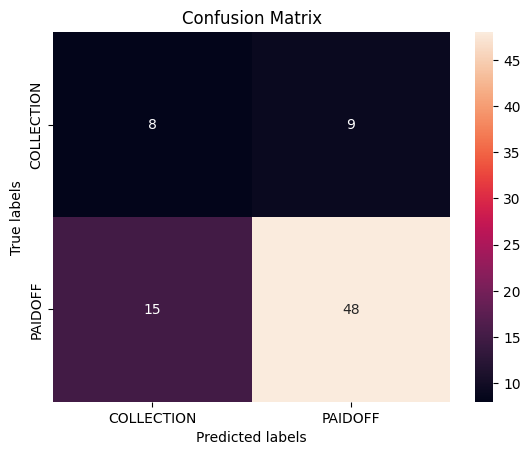

In [30]:
yhat2 = tree_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat2)

In [31]:
print (classification_report(y_test,yhat2))

              precision    recall  f1-score   support

           0       0.35      0.47      0.40        17
           1       0.84      0.76      0.80        63

    accuracy                           0.70        80
   macro avg       0.59      0.62      0.60        80
weighted avg       0.74      0.70      0.72        80



# Support Vector Machine (SVM)


**Creating a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.**

In [32]:
parameters3 = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': [1, 10, 20]
              }
svm = SVC(gamma ='auto', probability = True)

In [33]:
gscv3 = GridSearchCV(svm, parameters3, scoring = 'accuracy', cv = 10 )
svm_cv = gscv3.fit(X_train, y_train)

In [34]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'kernel': 'rbf'}
accuracy : 0.746875


In [35]:
print('Accuracy score: - ', svm_cv.score(X_test, y_test))

Accuracy score: -  0.75


### Plotting Confusion Matrix

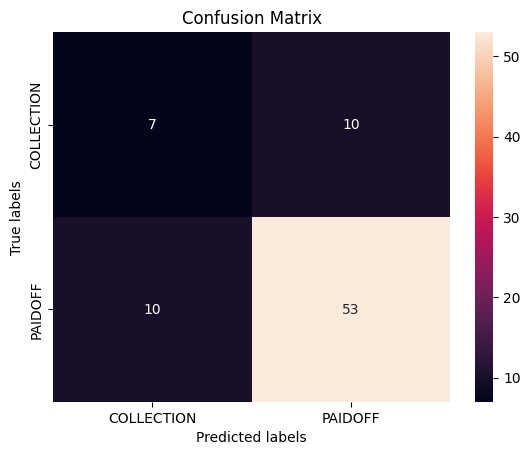

In [36]:
yhat3 = svm_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat3)

In [37]:
print (classification_report(y_test,yhat2))

              precision    recall  f1-score   support

           0       0.35      0.47      0.40        17
           1       0.84      0.76      0.80        63

    accuracy                           0.70        80
   macro avg       0.59      0.62      0.60        80
weighted avg       0.74      0.70      0.72        80



# Logistic regression

Creating a **logistic regression** object  then creating a  **GridSearchCV object**  <code>logreg_cv</code> with cv = 10.  Fitting the object to find the best parameters from the dictionary <code>parameters</code>.


In [38]:
parameters4 ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
lr=LogisticRegression()

In [39]:
gsvc4 = GridSearchCV(lr, parameters4, scoring = 'accuracy', cv = 10 )
lr_cv = gsvc4.fit(X_train, y_train)

In [40]:
print("tuned hpyerparameters :(best parameters) ",lr_cv.best_params_)
print("accuracy :",lr_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7625


In [41]:
print('Accuracy score: - ', lr_cv.score(X_test, y_test))

Accuracy score: -  0.7375


### Plotting Confusion Matrix

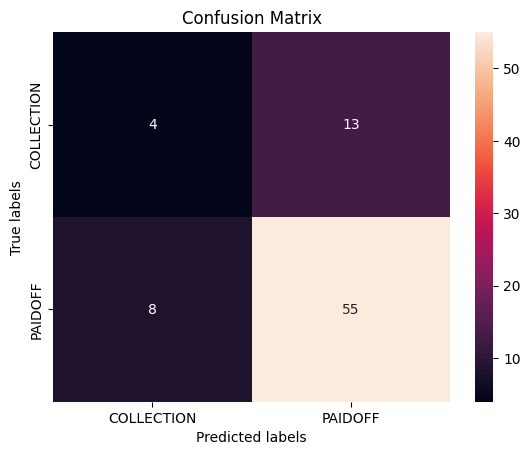

In [42]:
yhat4 = lr_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat4)

In [43]:
print (classification_report(y_test,yhat4))

              precision    recall  f1-score   support

           0       0.33      0.24      0.28        17
           1       0.81      0.87      0.84        63

    accuracy                           0.74        80
   macro avg       0.57      0.55      0.56        80
weighted avg       0.71      0.74      0.72        80



## Evaluation on the test data<br>
We will try to evaluate the data with these evaluation metrics:
* jaccard_score  
* f1_score 
* log_loss 

In [44]:
from sklearn.metrics import jaccard_score,  f1_score, log_loss
yhat1_prob = knn_cv.predict_proba(X_test)
yhat2_prob = tree_cv.predict_proba(X_test)
yhat3_prob = svm_cv.predict_proba(X_test)
yhat4_prob = lr_cv.predict_proba(X_test)

In [45]:
clf_list = {'KNN':[yhat1, yhat1_prob], 'Tree':[yhat2, yhat2_prob], 'SVM':[yhat3,yhat3_prob],'LogReg':[yhat4, yhat4_prob]}
L1 = []
L2 = []
L3 = []
for i,j in clf_list.items():
        L1.append(jaccard_score(y_test, j[0], pos_label = 1, average = 'binary'))
        L2.append(f1_score(y_test, j[0], pos_label = 1, average = 'binary'))
        L3.append(log_loss(y_test, j[1], normalize=True))
        evaluation = {'Jaccard_score':L1, 'F1_score':L2, 'Log_loss':L3}
    
evl_df = pd.DataFrame(evaluation, index = ["KNN", "Tree", "SVM", "LogReg"])
evl_df            

,Jaccard_score,F1_score,Log_loss
KNN,0.718310,0.836066,0.454538
Tree,0.666667,0.800000,0.844878
SVM,0.726027,0.841270,0.495009
LogReg,0.723684,0.839695,0.463213


## Finding the best Algorithm for our Data set.

In [46]:
algorithms = {'KNN':knn_cv.best_score_,'Tree':tree_cv.best_score_,'LogisticRegression':lr_cv.best_score_, 'SVM':svm_cv.best_score_}
bestalgorithm = max(algorithms, key=algorithms.get)
print('The Best Algorithm from the performed algorithms is',bestalgorithm,'with a score of',algorithms[bestalgorithm])
if bestalgorithm == 'Tree':
    print('Best Params is :',tree_cv.best_params_)
if bestalgorithm == 'KNN':
    print('Best Params is :',knn_cv.best_params_)
if bestalgorithm == 'LogisticRegression':
    print('Best Params is :',lr_cv.best_params_)
if bestalgorithm == 'SVM':
    print('Best Params is :',svm_cv.best_params_)


The Best Algorithm from the performed algorithms is Tree with a score of 0.765625
Best Params is : {'criterion': 'gini', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}


In [78]:
import pickle

model = DecisionTreeClassifier(criterion= 'gini', 
                              max_depth= 16, 
                              max_features= 'sqrt', 
                              min_samples_leaf= 4, min_samples_split=2,
                             splitter= 'random')

In [79]:
model_classifier = model.fit(X_train, y_train)

In [80]:
model_classifier.score(X_test, y_test)

0.75

In [88]:
y_hat = model_classifier.predict(X_test)
print(f1_score(y_test, y_hat, pos_label = 1, average = 'binary'))

0.8412698412698413


In [82]:
filename = 'loan_repayment.sav'
pickle.dump(model_classifier, open(filename, 'wb'))

In [83]:
loan_model = pickle.load(open('loan_repayment.sav', 'rb'))

In [53]:
#  input_list = [Principal, Term, Age, Gender,Weekend, Bechalor, Highschoolorbelow, College]

In [91]:
input_list = [ 800, 15, 32, 0, 1, 0, 1, 0 ]
prediction = loan_model.predict([input_list])
prediction

array([0], dtype=int64)

In [93]:
input_list = [1000, 30, 25, 0, 1, 0, 1, 0]
prediction = loan_model.predict([input_list])
prediction

array([0], dtype=int64)

### Therefore the best Algorithm for the our buisness problem is Decision tree classifier with highest accuracy and low log loss.

#### By Manoj Kumar Bahuguna

***